In [5]:
pip install tensorflow

In [6]:
import os
import json

In [7]:
kaggle_credentails = json.load(open("kaggle.json"))

In [8]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [9]:
!kaggle datasets download ameencaslam/3body-filtered-v2-10k

Dataset URL: https://www.kaggle.com/datasets/ameencaslam/3body-filtered-v2-10k
License(s): unknown
 99% 1.11G/1.11G [00:14<00:00, 112MB/s] 
100% 1.11G/1.11G [00:14<00:00, 83.5MB/s]


In [10]:
import zipfile
import os

# Define paths
zip_file_path = "/content/3body-filtered-v2-10k.zip"  # Change to your actual file path
extract_folder = "/content/extracted_folder"  # Folder where files will be extracted

# Ensure the extraction folder exists
os.makedirs(extract_folder, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  # ✅ Ensure zipfile.ZipFile is used
    zip_ref.extractall(extract_folder)

print("Extraction completed. Extracted files:", os.listdir(extract_folder))

Extraction completed. Extracted files: ['fake', 'real']


In [11]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
# Load and preprocess data
data_dir = '/content/extracted_folder'  # Replace with the path to your dataset
img_size = (224, 224)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# No augmentation for validation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 114s 199ms/step - accuracy: 0.6030 - loss: 0.7019 - val_accuracy: 0.6830 - val_loss: 0.6005 - learning_rate: 1.0000e-04
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 203ms/step - accuracy: 0.6813 - loss: 0.5996 - val_accuracy: 0.7280 - val_loss: 0.5439 - learning_rate: 1.0000e-04
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 208ms/step - accuracy: 0.7128 - loss: 0.5625 - val_accuracy: 0.7405 - val_loss: 0.5223 - learning_rate: 1.0000e-04
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 125s 249ms/step - accuracy: 0.7379 - loss: 0.5305 - val_accuracy: 0.7588 - val_loss: 0.5047 - learning_rate: 1.0000e-04
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 207ms/step - accuracy: 0.7393 - loss: 0.5218 - val_accuracy: 0.7485 - val_loss: 0.5198 - learning_rate: 1.0000e-04
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 204ms/step - accuracy: 0.7433 - loss: 0.5149 - val_accuracy: 0.7742 - val_loss: 0.4798 - learning_rate: 1.0000e-04
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 

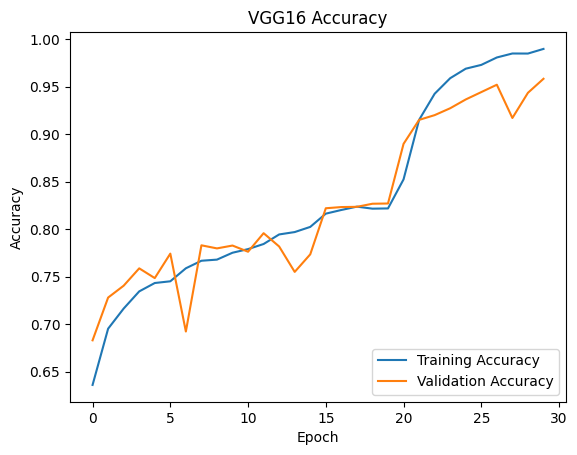

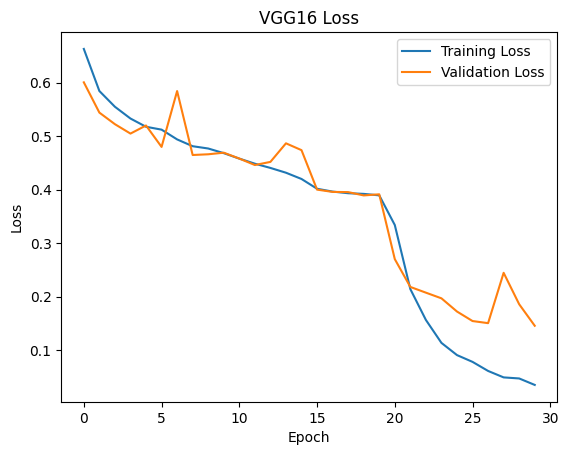

In [14]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping  # Import callbacks
import numpy as np
import os
import matplotlib.pyplot as plt

# Load and preprocess data
data_dir = '/content/extracted_folder'  # Replace with the path to your dataset
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the pretrained model function
def create_pretrained_model(base_model, num_classes=1):
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model

# Callbacks for better training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

# Create the model
model = create_pretrained_model(base_model)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Training VGG16...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:15]:  # Unfreeze the last few layers
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

print("Fine-tuning VGG16...")
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Save the model
model.save('VGG16_deepfake_model.h5')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step


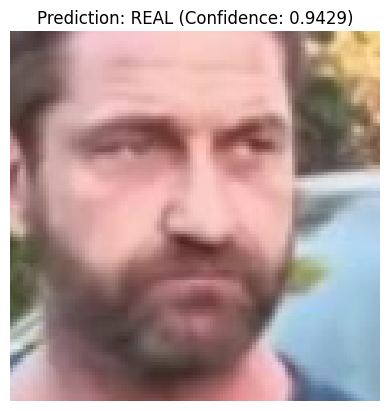

Prediction: REAL
Confidence: 0.9429


In [16]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-trained model
model_path = 'VGG16_deepfake_model.h5'  # Replace with the path to your saved model
model = tf.keras.models.load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to predict if the image is real or fake
def predict_image(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Make prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]  # Confidence score (0 = fake, 1 = real)

    # Determine if the image is real or fake
    if confidence > 0.5:
        result = "REAL"
    else:
        result = "FAKE"

    # Display the image and prediction
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {result} (Confidence: {confidence:.4f})")
    plt.show()

    return result, confidence

# Path to the image you want to predict
image_path = '/content/Real_1.png'  # Replace with the path to your image

# Predict the image
result, confidence = predict_image(image_path)
print(f"Prediction: {result}")
print(f"Confidence: {confidence:.4f}")